# Homework #2



## Question #1

There are four text files in the data folder

* Atatürk's "Nutuk" in Turkish
* Dicken's novel "Great Expectations" in English
* Flauberts' novel "Madam Bovary" in French
* A text file `unknown.txt` in an unknown language

Your tasks are

* Calculate how many times each character (letter) appear in each text.
* Calculate the character distributions, i.e. using the character counts, calculate the probability of each character appearing in the text.
* Find the set of characters common to all three texts.
* Using the common set and the KL-divergence, show that each language have different character distributions.
* Determine the language of the text file `unknown.txt` KL-divergence measure.

In [20]:
from collections import Counter
from scipy.stats import entropy
import numpy as np
import re

list01, list02=[], []
dict01, dict02, dict03={}, {}, {}
file01=open("ataturk_nutuk.txt", "r")
list01=(re.sub('[^a-z ]',' ', file01.read())).lower().split()
for i in range(len(list01)):
    list02+=list(list01[i])
dict01=Counter(list02)
dict02={key: value/sum(Counter(list02).values()) for key,value in dict01.items()}

list11, list12=[], []
dict11, dict12, dict13={}, {}, {}
file11=open("dickens_great_expectations.txt", "r")
list11=(re.sub('[^a-z ]',' ', file11.read())).lower().split()
for i in range(len(list11)):
    list12+=list(list11[i])
dict11=Counter(list12)
dict12={key: value/sum(Counter(list12).values()) for key,value in dict11.items()}

list21, list22=[], []
dict21, dict22, dict23={}, {}, {}
file21=open("flaubert_madame_bovary.txt", "r")
list21=(re.sub('[^a-z ]',' ', file21.read())).lower().split()
for i in range(len(list21)):
    list22+=list(list21[i])
dict21=Counter(list22)
dict22={key: value/sum(Counter(list22).values()) for key,value in dict21.items()}

list31, list32=[], []
dict31, dict32, dict33={}, {}, {}
file31=open("unknown.txt", "r")
list31=(re.sub('[^a-z ]',' ', file31.read())).lower().split()
for i in range(len(list31)):
    list32+=list(list31[i])
dict31=Counter(list32)
dict32={key: value/sum(Counter(list32).values()) for key,value in dict31.items()}

s0 = set(dict02.keys())
s1 = set(dict12.keys())
s2 = set(dict22.keys())
s3 = set(dict32.keys())

common_letters= s0.intersection(s1).intersection(s2).intersection(s3)
for i in common_letters:
    dict03[i]=dict02[i]
    dict13[i]=dict12[i]
    dict23[i]=dict22[i]
    dict33[i]=dict32[i]
    
arr03=np.array(list(dict03.values()))
arr13=np.array(list(dict13.values()))
arr23=np.array(list(dict23.values()))

print(entropy(arr03,arr13))
print(entropy(arr03,arr23))
print(entropy(arr13,arr23))

arr33=np.array(list(dict33.values()))
print(" ")

print(entropy(arr03,arr33))
print(entropy(arr13,arr33))
print(entropy(arr23,arr33))
print(" ")
print('The unknown.txt most probable is an English')

0.23789540510726226
0.36232911510254395
0.2342699759344951
 
0.37921903739382523
0.041110349566763175
0.18367782958140805
 
The unknown.txt most probable is an English


## Question #2

For this question consider the [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data) to the dataset.

Make [contingency tables](https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.) of the columns (using [`crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function from [pandas](https://pandas.pydata.org)) and figure out which pairs of columns are dependent and independent. Explain your result using statistical tests.

In [29]:
import pandas as pd
import numpy as np
import scipy.stats

car_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
car_data.columns=['buying','maint','doors','persons','lug_boot','safety','class']

ct0=pd.crosstab(car_data['buying'],car_data['maint'])
print(ct0)
print(' ')
ct1=pd.crosstab(car_data['maint'],car_data['doors'])
print(ct1)
print(' ')
ct2=pd.crosstab(car_data['doors'],car_data['persons'])
print(ct2)
print(' ')
ct3=pd.crosstab(car_data['persons'],car_data['lug_boot'])
print(ct3)
print(' ')
ct4=pd.crosstab(car_data['lug_boot'],car_data['safety'])
print(ct4)
print(' ')
ct5=pd.crosstab(car_data['buying'],car_data['safety'])
print(ct5)
print(' ')
print('Attributes look like have independent relationship between each other')
print(' ')
ct00=pd.crosstab(car_data['buying'],car_data['class'])
print(ct00)
print(' ')
ct01=pd.crosstab(car_data['maint'],car_data['class'])
print(ct01)
print(' ')
ct02=pd.crosstab(car_data['doors'],car_data['class'])
print(ct02)
print(' ')
ct03=pd.crosstab(car_data['persons'],car_data['class'])
print(ct03)
print(' ')
ct04=pd.crosstab(car_data['lug_boot'],car_data['class'])
print(ct04)
print(' ')
ct05=pd.crosstab(car_data['safety'],car_data['class'])
print(ct05)
print(' ')
print('Class column looks like has dependent relationship with attributes')
print(' ')

print(scipy.stats.chisquare(pd.crosstab(car_data['buying'],car_data['maint']),axis=None))
print(scipy.stats.chisquare(pd.crosstab(car_data['maint'],car_data['doors']),axis=None))
print(scipy.stats.chisquare(pd.crosstab(car_data['doors'],car_data['persons']),axis=None))
print(scipy.stats.chisquare(pd.crosstab(car_data['buying'],car_data['class']),axis=None))
print(scipy.stats.chisquare(pd.crosstab(car_data['maint'],car_data['class']),axis=None))
print(scipy.stats.chisquare(pd.crosstab(car_data['doors'],car_data['class']),axis=None))

maint   high  low  med  vhigh
buying                       
high     108  108  108    108
low      108  108  108    108
med      108  108  108    108
vhigh    108  108  108    108
 
doors    2    3    4  5more
maint                      
high   108  108  108    108
low    108  108  108    108
med    108  108  108    108
vhigh  108  108  108    108
 
persons    2    4  more
doors                  
2        144  144   144
3        144  144   144
4        144  144   144
5more    144  144   144
 
lug_boot  big  med  small
persons                  
2         192  192    192
4         192  192    192
more      192  192    192
 
safety    high  low  med
lug_boot                
big        192  192  192
med        192  192  192
small      192  192  192
 
safety  high  low  med
buying                
high     144  144  144
low      144  144  144
med      144  144  144
vhigh    144  144  144
 
Attributes look like have independent relationship between each other
 
class   acc  good  unacc  vgood

## Question #3

For this question, use [Default of Credit Card Clients Data Set]() from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls) to the dataset.

Your tasks are

* Inspect the dataset.
* Would it be appropriate to form a linear regression model to predict the `default payment next month` variable? Explain.
* Form a [contingency table](https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.) of the columns `SEX` vs `default payment next month` and `EDUCATION` vs `default payment next month`.
* Are there statistically verifiable relationships between credit card defaults, the gender of and the education level the borrower? Which is stronger? Quantify your analysis using [Chi Square Test](https://en.wikipedia.org/wiki/Chi-squared_test).

In [45]:
import pandas as pd
import numpy as np
import scipy.stats

credit_data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls')

#Linear regression model can be used in this context because we are trying to predict one variable's situation which is dependent to other variables. There is more than one
#independent variables so we need to implement multiple regression.

credit_data=credit_data[1:]
ct0=pd.crosstab(credit_data['X2'],credit_data['Y'])
print(ct0)
print(' ')
ct1=pd.crosstab(credit_data['X3'],credit_data['Y'])
print(ct1)
print(' ')

print(scipy.stats.chisquare(pd.crosstab(credit_data['X2'],credit_data['Y']),axis=None))
print(scipy.stats.chisquare(pd.crosstab(credit_data['X3'],credit_data['Y']),axis=None))
print(' ')
print('Education category has strong relationship with default payement more than gender category.')

Y       0     1
X2             
1    9015  2873
2   14349  3763
 
Y       0     1
X3             
0      14     0
1    8549  2036
2   10700  3330
3    3680  1237
4     116     7
5     262    18
6      43     8
 
Power_divergenceResult(statistic=11277.109866666666, pvalue=0.0)
Power_divergenceResult(statistic=71717.81573333332, pvalue=0.0)
 
Education category has strong relationship with default payement more than gender category.


## Question #4

For this question, use the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) from UCI.  Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) to the dataset.

Your tasks are

* Form a [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model for this dataset.
* Test your model on random samples of your data and calculate its accuracy.
* Repeat your calculation 100 times and give an interval of accuracy values leaving the best 2.5% and worst 2.5% accuracy values.
* Is there a better way of doing this without repeating the calculation 100 times? Explain.
* Find the best parameter $k$ for your dataset for the K-NN model.

bot 2.5%: 0.8666666666666667 top 2.5%: 1.0


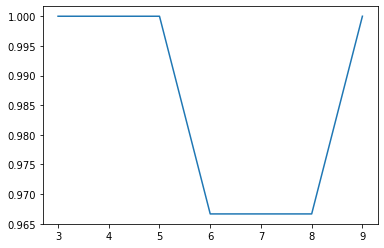

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats
import matplotlib.pyplot as plt

iris_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",sep=',',header=None)

x=np.array(iris_data.iloc[:,0:3])
y=np.array(iris_data.iloc[:,4])
acc = np.zeros(100)

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
    model= KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    model.fit(x_train,y_train)
    acc[i] = accuracy_score(y_test,model.predict(x_test))

low, high = np.percentile(acc,[2.5, 97.5])

print("bot 2.5%: {} top 2.5%: {}".format(low, high))

#sklearn.model_selection.KFold method can be used instead of making 100 times calculation to create tranin and test data because it has shuffling ability.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
kvals = np.arange(3,10)
kacc = np.zeros(len(kvals))

for i,k in enumerate(kvals):
    model= KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(x_train,y_train)
    kacc[i] = accuracy_score(y_test,model.predict(x_test))

plt.plot(kvals,kacc)

#There is no actual k for the best fitting. It can be 3,4,5 and 9 in this example but it changes according to sample selection.

## Question #5

For this question, we are going to use [Concrete Slump Test Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test) from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data) to the dataset.

Your tasks are

* Form three separate linear regression model for the following dependent variables:

  - SLUMP (cm)
  - FLOW (cm)
  - 28-day Compressive Strength (Mpa)
  
* Compare how well these models fit.

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

cement_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data",sep=',',header=None)
cement_data=cement_data[1:]

x1=np.array(cement_data.iloc[:,1:6])
y1=np.array(cement_data.iloc[:,7])
model1=LinearRegression()
model1.fit(x1,y1)
print(model1.score(x1,y1))
print(' ')
x2=np.array(cement_data.iloc[:,1:6])
y2=np.array(cement_data.iloc[:,8])
model2=LinearRegression()
model2.fit(x2,y2)
print(model2.score(x2,y2))
print(' ')
x3=np.array(cement_data.iloc[:,1:6])
y3=np.array(cement_data.iloc[:,9])
model3=LinearRegression()
model3.fit(x3,y3)
print(model3.score(x3,y3))
print(' ')
print('The third model has best fit in this example.')

0.2441875844375473
 
0.31989767622566434
 
0.497603190398332
 
The third model has best fit in this example.
